# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

## Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1 Stuff

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

#### Code Segment + Analysis for Q1.1

In [2]:
airbnb_path = './data/airbnb_hw.csv'
airbnb_df = pd.read_csv(airbnb_path)

In [3]:
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Well, the hint mentioned missing value checking, so let's do that.

In [4]:
airbnb_df.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

Doesn't look like there are actually any nulls for the Price column, so the first thing I always like doing when cleaning data is get a feel with the info & describe func to see how the values range.

In [5]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

Ahhh... the `Price` column is encoded as an object (or string). This is probably what the hint alluded to. My guess is that there's probably commas manually put in to express numbers > 999, so they're put as strings like "1,000" instead of just "1000". Let's test that theory.

POST EDIT: Yeah so I ran the following code; \
test = pd.to_numeric(airbnb_df['Price'])  \
and it gave me an error stating "Unable to parse string "1,990"". So yeah, I was right. No problem, just need to regex that part out.

In [6]:
# As proof that there is, in fact, a comma in the Price column :)
airbnb_df['Price'][101]

'1,990'

In [7]:
modified_airbnb_df = airbnb_df.copy()
modified_airbnb_df['Price'] = modified_airbnb_df['Price'].replace({r',': ''}, regex=True)

Ok, NOW let's try doing the to_numeric thing from earlier.

In [8]:
modified_airbnb_df['Price'] = pd.to_numeric(modified_airbnb_df['Price'])

And with any luck, we should see that it's now a numeric!

In [9]:
modified_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  int64  
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(4), object

In [10]:
modified_airbnb_df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


In [11]:
modified_airbnb_df['Price'].isnull().sum()

np.int64(0)

And just to finalize the check, let's make sure that index 101 is 1990 with no comma this time.

In [12]:
modified_airbnb_df['Price'][101]

np.int64(1990)

In [13]:
modified_airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In conclusion, there weren't any missing values, it was just that the `Price` column happened to be dtype object instead of dtype int. Attempting to cast the `Price` column to numerics caused an error stating that there was an inconvertible string "1,990", which told me that I needed to clean the values by removing commas from values >999. Doing so with regex replacement and then converting to numeric did the job, and I have saved this modified data into a separate df called `modified_airbnb_df` to not overwrite the old df.

#### Code Segment + Analysis for Q1.2

In [14]:
police_use_path = './data/mn_police_use_of_force.csv'
police_use_df = pd.read_csv(police_use_path)

In [15]:
police_use_df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


Well, I can already see the NaN's, so let's get a count.

In [16]:
police_use_df.isnull().sum()

response_datetime       0
problem                 0
is_911_call             0
primary_offense         0
subject_injury       9848
force_type              0
force_type_action       0
race                 1024
sex                   501
age                  1066
type_resistance      2986
precinct                0
neighborhood            4
dtype: int64

There's 9848 NaN's... yooo.... let me see a breakdown on the column values.

In [17]:
police_use_df['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [18]:
missing_proportion = 9848 / (1631 + 1446 + 9848)
missing_proportion

0.7619342359767892

Ok actually that's not very helpful tbh. As far as I'm seeing, it's a 1631/1446/9848 split between yes/no/nan. That's pretty terrible, and suggests around 76% missing data proportion. Let's look into the cross-tabulation to see if there's an explanation!

In [19]:
pd.crosstab(police_use_df['subject_injury'], police_use_df['force_type'], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


There does not seem to be any obvious trend for a lot of these columns for NaNs. I mean, the "Less Lethal" and "Maximal Restraint Technique" columns are all NaNs, and those could be non-injury related cases, but I don't think it's appropriate to assume and impute a particular value here. As for Bodily Force, Chemical Irritant, Taser, and the other smaller columns, there's no super obvious trend that would have an accurate impute here. Thus, I think that this data is not particularly cleanable beyond this insight. The conclusion is that a large proportion of the data (76%) are missing, and that's concerning - but there's no clear trends that would allow a clean impute/assumption for the missings from what I'm seeing, and thus I don't intend on going any further than this exploratory analysis.

#### Code Segment + Analysis for Q1.3

In [20]:
url = "http://vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv"
justice_df = pd.read_csv(url)

C:\Users\kevin\AppData\Local\Temp\ipykernel_9212\734111033.py:2: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,39

In [21]:
justice_df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


Ok... hint says look at `WhetherDefendantWasReleasedPretrial` in particular so let's look at the value breakdown for it.

In [22]:
justice_df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64

Well, given that there's an oddball value here, I looked into seeing if there was a codebook explaining what this 9 meant, and sure enough, there was! https://vscc.virginia.gov/VirginiaPretrialDataProject/October%202017%20Cohort_Full%20Data%20Codebook_FINAL.pdf \
The codebook suggests that this 9 means "unclear", so we'll just make them NaNs since 9 isn't helpful.

In [23]:
modified_justice_df = justice_df.copy()
modified_justice_df['WhetherDefendantWasReleasedPretrial'] = modified_justice_df['WhetherDefendantWasReleasedPretrial'].replace({9: np.nan})

In [24]:
modified_justice_df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64

In conclusion, for this section I just followed the instructions to a tee - looked at the `WhetherDefendantWasReleasedPretrial` column, took a look at the value counts, and replaced the 'unclear' encoded values (the 9's) with NaNs as suggested. 

#### Code Segment + Analysis for Q1.4
Note that I already read justice_df above from Q1.3 so I didn't do it again here :) and since it's unmodified, I'll use it again here. Looking at the codebook again, I took a look to see what they had to say for these columns.

In [25]:
justice_df['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False)

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64

In [26]:
justice_df['ImposedSentenceAllChargeInContactEvent'].unique()

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

So the codebook suggests that these values are all imposed sentence terms in months. It makes sense that they are in decimal format. The biggest thing I'm seeing here is that 
1. The dtype is object, so these are strings again. We want to typecast these.
2. There are blank strings we gotta handle.

I think the first one probably makes more sense to handle first. Then we'll figure out how to deal with these missing values based on the hint with `SentenceTypeAllChargesAtConvicitionInContactEvent`.

Okay, and so from the codebook, 0 is probation/no incarceration, 1 is jail up to 12 months, 2 is prison (1+ year), 4 is other (pending, dismissed, deferred, etc.), and 9 is N/A.

In [27]:
pd.crosstab(justice_df['ImposedSentenceAllChargeInContactEvent'], justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


This cross-tabulation suggests that all the blanks are actually either in 4 or 9 - either pending/dismissed/deferred, or unknown. Because of this I know that it'd probably make the most sense to cast the 4's to values of 0 since pending/dismissed/deferred cases have not received their sentences yet. For the 9's, I think I'll cast them to NaNs since it's unknown so it's not exactly accurate to give them any other value in my opinion. First though I'll cast the `ImposedSentenceAllChargeInContactEvent` values to numerics.

In [28]:
modified_justice_df = justice_df.copy()
modified_justice_df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(modified_justice_df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

Now that they're numerics, the blanks should be NaNs now. Like I said before, I think that the 4s should be 0 since those are individuals that are still awaiting their sentences and whatnot, so they have not actually served time in jail. I'll leave the 9s alone since those are unknown so they can stay NaNs.

In [29]:
pd.crosstab(modified_justice_df['ImposedSentenceAllChargeInContactEvent'], modified_justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2
ImposedSentenceAllChargeInContactEvent,,,
0.000000,4953,0,0
0.032854,0,6,0
0.065708,3,21,0
0.098563,2,6,0
0.131417,4,10,0
...,...,...,...
1200.000000,0,0,1
1500.000000,0,0,1
1752.000000,0,0,1


In [30]:
modified_justice_df.loc[modified_justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 
                        'ImposedSentenceAllChargeInContactEvent'] = 0

Let's cross-tabulate the data now and see what it looks like!

In [31]:
pd.crosstab(modified_justice_df['ImposedSentenceAllChargeInContactEvent'], modified_justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4
ImposedSentenceAllChargeInContactEvent,,,,
0.000000,4953,0,0,8779
0.032854,0,6,0,0
0.065708,3,21,0,0
0.098563,2,6,0,0
0.131417,4,10,0,0
...,...,...,...,...
1200.000000,0,0,1,0
1500.000000,0,0,1,0
1752.000000,0,0,1,0


That looks like it makes much more sense! And we should still have those 274 NaNs from the cases which were labeled as 9's, so let's check...

In [32]:
modified_justice_df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()

np.int64(274)

So in conclusion, there were two issues that I was able to resolve thanks to the codebook - one, these were non-numerically stored, so I had to cast them over, and there were also blank values. The blank values for the 4 classified cases made sense to be imputed as 0s since those individuals would not have a sentence yet (hence 0), while the blank values for the 9 classified cases made sense to be kept as NaNs since those are unknowns. The data is now clean :)

## Q2 Stuff

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

### Q2.1

In [33]:
shark = pd.read_excel('./data/GSAF5.xls')

In [34]:
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q2.2

In [35]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7042 non-null   object 
 1   Year            7040 non-null   float64
 2   Type            7024 non-null   object 
 3   Country         6992 non-null   object 
 4   State           6557 non-null   object 
 5   Location        6475 non-null   object 
 6   Activity        6457 non-null   object 
 7   Name            6823 non-null   object 
 8   Sex             6463 non-null   object 
 9   Age             4048 non-null   object 
 10  Injury          7007 non-null   object 
 11  Fatal Y/N       6481 non-null   object 
 12  Time            3516 non-null   object 
 13  Species         3911 non-null   object 
 14  Source          7022 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

So for step 2, looks like there's only two columns with no data - Unnamed: 21, and Unnamed: 22.

In [36]:
shark_modified = shark.copy()
shark_modified = shark_modified.drop(columns=['Unnamed: 21', 'Unnamed: 22'])

In [37]:
shark_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7042 non-null   object 
 1   Year            7040 non-null   float64
 2   Type            7024 non-null   object 
 3   Country         6992 non-null   object 
 4   State           6557 non-null   object 
 5   Location        6475 non-null   object 
 6   Activity        6457 non-null   object 
 7   Name            6823 non-null   object 
 8   Sex             6463 non-null   object 
 9   Age             4048 non-null   object 
 10  Injury          7007 non-null   object 
 11  Fatal Y/N       6481 non-null   object 
 12  Time            3516 non-null   object 
 13  Species         3911 non-null   object 
 14  Source          7022 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [38]:
shark_modified['Year'].value_counts(dropna=False)

Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
         ... 
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1804.0      1
Name: count, Length: 262, dtype: int64

In [39]:
shark_modified['Year'].describe()

count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64

Hmm... the range of values for the year seem to go from 0, to 2026. How odd.

### Q2.3

The following code is for step 3. Let's filter only those 1940 and beyond and see the trend!

In [40]:
shark_years_modified = shark_modified[shark_modified['Year'] >= 1940]

In [41]:
shark_years_modified.describe()

,Year,original order
count,5507.000000,5268.000000
mean,1992.225350,4165.775626
std,24.169336,1521.433279
min,1940.000000,1531.000000
25%,1970.000000,2848.750000
50%,2000.000000,4165.500000
75%,2013.000000,5482.250000
max,2026.000000,6802.000000


In [42]:
shark_years_modified['Year'].value_counts(dropna=False)

Year
2015.0    143
2017.0    141
2016.0    133
2011.0    128
2014.0    126
         ... 
1946.0     26
1979.0     25
1940.0     24
1945.0     16
2026.0      1
Name: count, Length: 87, dtype: int64

So, just off a tiny look it seems like since 1940 there's been an increase, but how about let's just plot it on a histogram and make a more definitive conclusion?

<Axes: >

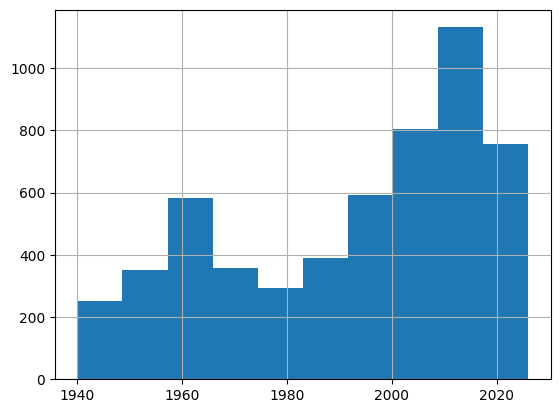

In [43]:
shark_years_modified['Year'].hist()

So yeah, definitely seems like there has been more shark attacks recently compared to the 20th century, but there was a sharp peak somewhere around the 2010s that decreased in the 2020s.

### Q2.4

OK. Now we're going to deal with the ages. Now, I will note this; I decided to continue using the cleaned version of the data as these steps progress. This is important, because the remaining parts of these questions will be contingent on the fact that the data has been filtered to only include entries with the year being 1940 or more recent. I feel like this is a valid interpretation of the instructions, and if this was not the case then that is likely the reason for any differences (i.e. proportions, graph shapes, etc.) from what I was supposed to do instead! Thanks :)

In [44]:
shark_ages_modified = shark_years_modified.copy()
shark_ages_modified['Age'].unique()

array(['?', '63', '9', '39', '19', '7', '85', '69', '18', '66', '21',
       '40', '37', '16', '20', '12', '42', '26', '14', '45', '30', '30+',
       '56', '40+', '29', 35, 58, 29, 24, 20, 55, 17, 12, 37, 36, 23, 40,
       28, 69, 48, '60+', 57, 45, 61, 27, 38, 16, 68, 33, 30, 15, 41, 14,
       43, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 65, 64, '13', nan,
       '11', '46', '32', '10', '64', '62', '22', '15', '52', '44', '47',
       '55', '59', '8', '50', '34', '38', '30s', '20/30', '35', '65',
       '20s', '77', '60', '49', '!2', '24', '73', '25', '50s', '58', '67',
       '17', '6', '41', '53', '68', '43', '51', '31', 39, 51, 10, 13, 60,
       '40s', 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 50, 'M', 9, 31, 11,
       34, '!6', '!!', 47, 7, 71, 59, 53, 54, 75, '45 and 15', 73, 52, 70,
       4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 67, 74,
       '9 & 60', 'a minor', 6, 3, 82, '40?', 66, 72, '23', '36', '71',
       '48', '70', '18 months', '57', '28', '33', '61', '74

Okay... jeez. There's a LOT of disgusting values in here. For starters, I'm seeing stuff like "Middle age", "60+", "nan", "# and #", etc. That's tragically bad. Looks like there's a lot of cleaning to do here. Now, if I'm being honest, I feel like there's only two cases I need to handle for sure here. The first of the weird cases are the "#+" cases - that is, 30+, 40+, etc. now there's two ways to handle this I think; either make them NaNs because it's unclear data, or just round them off to their lower bound (for example, 30+ or 30s -> 30). Another thing of note is cases where it's "# & #", or a list of numbers in a row (like, "37, 67, 35, 27,  ? & 27"). I think one thing I could do is to separate each of these into their own entries duplicated but with each of the ages separately - my biggest quarrel with that is it'd kinda be violating 2NF for databases, so the other option is just to coerce them by making them NaNs. And honestly, for my sanity, I'm going to be doing that. For everything else it's stuff like "adult", "Elderly", yeah those are ALL becoming NaNs. NO shot I can do anything about that. Anyhoo, here's some regex I spent a while writing up to catch as many cases as possible before I got tired. Shout-out https://regex101.com/.

In [45]:
shark_ages_modified['Age'] = shark_ages_modified['Age'].replace({r'(\d)s': r'\1'}, regex=True) # this one deals with "#s"
shark_ages_modified['Age'] = shark_ages_modified['Age'].replace({r'(\d)\'s': r'\1'}, regex=True) # this one deals with "#'s"
shark_ages_modified['Age'] = shark_ages_modified['Age'].replace({r'(\d)\+': r'\1'}, regex=True) # this one deals with "#+"
shark_ages_modified['Age'] = shark_ages_modified['Age'].replace({r'\s(\d)': r'\1'}, regex=True) # this one deals with " #"
shark_ages_modified['Age'] = shark_ages_modified['Age'].replace({r'(\d)\s': r'\1'}, regex=True) # this one deals with "# "


In [46]:
shark_ages_modified['Age'].unique()

array(['?', '63', '9', '39', '19', '7', '85', '69', '18', '66', '21',
       '40', '37', '16', '20', '12', '42', '26', '14', '45', '30', '56',
       '29', 35, 58, 29, 24, 20, 55, 17, 12, 37, 36, 23, 40, 28, 69, 48,
       '60', 57, 45, 61, 27, 38, 16, 68, 33, 30, 15, 41, 14, 43, 26,
       'Middle age', 18, 21, 49, 25, 46, 19, 65, 64, '13', nan, '11',
       '46', '32', '10', '64', '62', '22', '15', '52', '44', '47', '55',
       '59', '8', '50', '34', '38', '20/30', '35', '65', '77', '49', '!2',
       '24', '73', '25', '58', '67', '17', '6', '41', '53', '68', '43',
       '51', '31', 39, 51, 10, 13, 60, 62, 'teen', 8, 22, 32, 56, 'Teen',
       42, 50, 'M', 9, 31, 11, 34, '!6', '!!', 47, 7, 71, 59, 53, 54, 75,
       '45and15', 73, 52, 70, 4, 63, 44, '28&22', '22,57,31', 67, 74,
       '9&60', 'a minor', 6, 3, 82, '40?', 66, 72, '23', '36', '71', '48',
       '70', '18months', '57', '28', '33', '61', '74', '27', '3', '28&26',
       '5', '54', '86', '18or20', '12or13', '46&34', '28,

And I think I've done enough. Anything else includes "or", or it includes "and" (multiple ages), both of which I think are not worthy of handling since there's no obvious way to handle them. Everything else is pretty much just junk (stuff like 0/0, "Teen", etc) and thus I'll just coerce those to NaNs. Let's take a look now!

In [47]:
shark_ages_modified['Age'] = pd.to_numeric(shark_ages_modified['Age'], errors='coerce')

In [48]:
shark_ages_modified['Age'].unique()

array([nan, 63.,  9., 39., 19.,  7., 85., 69., 18., 66., 21., 40., 37.,
       16., 20., 12., 42., 26., 14., 45., 30., 56., 29., 35., 58., 24.,
       55., 17., 36., 23., 28., 48., 60., 57., 61., 27., 38., 68., 33.,
       15., 41., 43., 49., 25., 46., 65., 64., 13., 11., 32., 10., 62.,
       22., 52., 44., 47., 59.,  8., 50., 34., 77., 73., 67.,  6., 53.,
       51., 31., 71., 54., 75., 70.,  4., 74.,  3., 82., 72.,  5., 86.,
       84., 87.,  1., 81., 78.])

Yep. Looks a lot better. Let's graph it on a histogram now.

<Axes: >

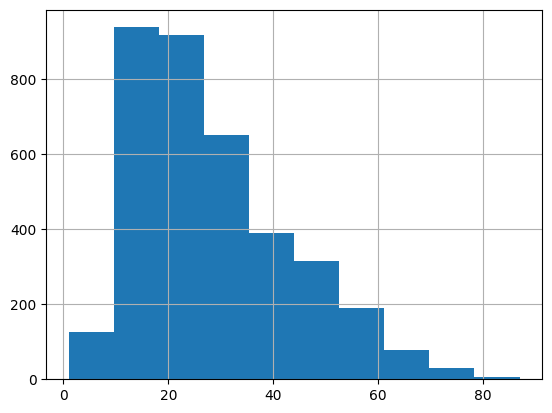

In [49]:
shark_ages_modified['Age'].hist()

Looks pretty clean to me.

### Q2.5

Alright, this one should thankfully be short and sweet. It's literally just, what proportion of the victims are male, so we'll check out the sex column. Now, I'll first make sure that there aren't any weird values...

In [50]:
shark_ages_modified['Sex'].unique()

array(['M', 'F', 'F ', 'M ', nan, ' M', 'm', 'lli', 'M x 2'], dtype=object)

...Yeah, of course it wouldn't be that easy. Now, I genuinely have NO idea what the HECK M x 2 here means. I suspect it means, there were two males, but let's just take a look at how many instances of it there actually are:

In [51]:
shark_ages_modified['Sex'].value_counts(dropna=False)

Sex
M        4328
F         718
NaN       452
M           3
F           2
 M          1
m           1
lli         1
M x 2       1
Name: count, dtype: int64

Figures that there's only one. So I'll just make lli and M x 2 NaNs. As for the others, just like in the previous one, I'll just write regex to handle them :)

In [52]:
shark_sex_modified = shark_ages_modified.copy()
shark_sex_modified['Sex'] = shark_sex_modified['Sex'].replace({r'([MF])\s': r'\1'}, regex=True) # this one deals with "F " or "M "
shark_sex_modified['Sex'] = shark_sex_modified['Sex'].replace({r'\s([MF])': r'\1'}, regex=True) # this one deals with " F" or " M"
shark_sex_modified['Sex'] = shark_sex_modified['Sex'].replace({r'm': r'M'}, regex=True) # since there's only one case of lowercase (m), just enforce that to upper
# and last but not least, the remaining just become NaNs
shark_sex_modified['Sex'] = shark_sex_modified['Sex'].replace({r'lli': np.nan}, regex=True) # lli case
shark_sex_modified['Sex'] = shark_sex_modified['Sex'].replace({r'Mx 2': np.nan}, regex=True) # M x 2 case

In [53]:
shark_sex_modified['Sex'].value_counts(dropna=False)

Sex
M      4333
F       720
NaN     454
Name: count, dtype: int64

Looks a little better to me! Let's see what the proportion of males is NOW!

In [54]:
male_proportion = 4333 / (4333 + 720 + 454)
male_proportion

0.7868167786453605

So if we're counting NaNs, they're about 78% of shark attacks. Yikes.

### Q2.6

As is standard, let's go ahead and see what this Type variable actually looks like.

In [55]:
shark_sex_modified['Type'].unique()

array(['Provoked', 'Unprovoked', 'Questionable', 'unprovoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

Alright, and the counts?

In [56]:
shark_sex_modified['Type'].value_counts(dropna=False)

Type
Unprovoked             4097
Provoked                518
Invalid                 402
Watercraft              280
Sea Disaster            156
Questionable             26
NaN                      14
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

Well, as far as I'm concerned, stuff like "Sea Disaster", "Watercraft", and "Questionable" (big ones) are all going to unknown. How unfortunate, but it just seems like the easiest way to clean this (and the least misleading).

In [57]:
shark_type_modified = shark_sex_modified.copy()
# yeah I'm not writing out comments for each of these, they're pretty self explanatory
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Invalid': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Watercraft': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Sea Disaster': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Questionable': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Boat': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'?': 'Unknown'}) # can't say this ones regex because ? is a special char
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Unconfirmed': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Unverified': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'Under investigation': 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({np.nan: 'Unknown'}, regex=True)
shark_type_modified['Type'] = shark_type_modified['Type'].replace({r'\sProvoked': 'Provoked'}, regex=True) # provoked with leading space
shark_type_modified['Type'] = shark_type_modified['Type'].replace({'unprovoked': 'Unprovoked'}, regex=True) # case sensitive unprovoked

In [58]:
shark_type_modified['Type'].value_counts(dropna=False)

Type
Unprovoked    4098
Unknown        889
Provoked       520
Name: count, dtype: int64

Fantastic! Now it's all cleaned into those three categories we wanted. Let's see how many of these attacks are unprovoked, then!

In [59]:
unprovoked_proportion = 4098 / (4098 + 889 + 520)
unprovoked_proportion

0.7441438169602325

Looks like around 74% of the attacks were unprovoked. Yikes.

### Q2.7

This one asks for the Fatal Y/N to be covered, so let's handle these - but first let's take a look at them as usual.

In [60]:
shark_type_modified['Fatal Y/N'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

...Yeah this is super fun. Just to keep consistent with the M x 2 thing from before as well by the way, I'm parsing that Y x 2 as an unknown.

In [61]:
shark_type_modified['Fatal Y/N'].value_counts(dropna=False)

Fatal Y/N
N          4213
Y           824
NaN         406
UNKNOWN      45
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
Name: count, dtype: int64

Ok, showtime as usual.

In [62]:
shark_fatal_modified = shark_type_modified.copy()
# yeah I'm not writing out comments for each of these, they're pretty self explanatory
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({np.nan: r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({'UNKNOWN': r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({'Nq': r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({'Y x 2': r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({'F': r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({'M': r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({2017: r'Unknown'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({r'\sN': 'N'}, regex=True)
shark_fatal_modified['Fatal Y/N'] = shark_fatal_modified['Fatal Y/N'].replace({r'n': 'N'}, regex=True)

In [63]:
shark_fatal_modified['Fatal Y/N'].value_counts(dropna=False)

Fatal Y/N
N          4221
Y           824
UNkNowN     462
Name: count, dtype: int64

Great, there we go. Now we only have Y/N/Unknown.

### Q2.8

For this one, let's start by cross-tabulating sex and attack type! So, answering the question: Are sharks more likely to launch unprovoked attacks on men or women?

In [64]:
pd.crosstab(shark_fatal_modified['Type'], shark_fatal_modified['Sex'])

Sex,F,M
Type,,
Provoked,28,448
Unknown,79,542
Unprovoked,613,3343


In [65]:
unprovoked_male_proportion = 3343 / (3343 + 542 + 448)
unprovoked_male_proportion

0.7715208862220171

In [66]:
unprovoked_female_proportion = 613 / (613 + 79 + 28)
unprovoked_female_proportion

0.8513888888888889

And the rates show that actually, sharks are more likely to launch unprovoked attacks on women! This isn't necessarily statistically sound, but just looking at the proportions alone this is the conclusion I can reach.

Next question! Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?

In [67]:
pd.crosstab(shark_fatal_modified['Type'], shark_fatal_modified['Fatal Y/N'])

Fatal Y/N,N,UNkNowN,Y
Type,,,
Provoked,498,9,13
Unknown,366,400,123
Unprovoked,3357,53,688


In [68]:
provoked_fatal_proportion = 13 / (13 + 498 + 9)
provoked_fatal_proportion

0.025

In [69]:
unprovoked_fatal_proportion = 688 / (688 + 3357 + 53)
unprovoked_fatal_proportion

0.16788677403611518

And honestly, I could tell that easily. Clearly, there are more fatal unprovoked cases proportionally.

Last analysis based question - Is it more or less likely to be fatal when the victim is male or female?

In [70]:
pd.crosstab(shark_fatal_modified['Sex'], shark_fatal_modified['Fatal Y/N'])

Fatal Y/N,N,UNkNowN,Y
Sex,,,
F,572,59,89
M,3351,323,659


In [71]:
male_fatal_proportion = 659 / (659 + 3351 + 323)
male_fatal_proportion

0.15208862220170782

In [72]:
female_fatal_proportion = 89 / (89 + 572 + 59)
female_fatal_proportion

0.12361111111111112

And just by 3%, the data suggests that the proportion of these recorded shark attacks is more likely to be fatal if the victim is male rather than female.

Now personally, I think sharks can be cool. As long as we are separated by reinforced glass or co-exist 500 miles away from each other. Basically, I don't feel like getting mauled by something that can absolutely kill me. So I think they can be cool but with a big caveat.

### Q2.9

Alright for this one I need to figure out the proportion of attacks by white sharks. Based on the preview from earlier, this is going to be a pain since they're all in the species portion and that didn't look very pretty. Let's take a look.

In [76]:
shark_fatal_modified['Species '].unique()

array(['Lemon shark 1.8 m (6ft)', '5m (16.5ft) Great White',
       'Undetermined', ...,
       'White shark, species identity confirmed by tooth pattern',
       'White shark, 160-kg [353-lb], identity confirmed by tooth pattern',
       ' White shark'], shape=(1568,), dtype=object)

.......Super fun.

In [77]:
shark_fatal_modified['Species '].value_counts(dropna=False)

Species 
NaN                                                   2070
White shark                                            180
Shark involvement prior to death was not confirmed      98
Shark involvement not confirmed                         86
Invalid                                                 78
                                                      ... 
24" to 30" shark                                         1
2.4 m shark                                              1
Bull shark, 10'                                          1
Lemon shark, >1 m                                        1
 White shark                                             1
Name: count, Length: 1568, dtype: int64

Well the most logical thing to do from what I'm seeing is to just filter by all the cases where the word "white" is in the word. So let's see how many instances of that there actually are.

In [ ]:
# yeah I can't even lie I don't know what the str.split() in the hint was supposed to be... I'm just gonna do this instead :)
temp_white_shark_analysis = shark_fatal_modified['Species '].str.contains('white', case=False)
temp_white_shark_analysis

0       False
1        True
2       False
3        True
4       False
        ...  
5504      NaN
5505      NaN
5506    False
5507    False
5508    False
Name: Species , Length: 5507, dtype: object

In [80]:
temp_white_shark_analysis.value_counts(dropna=False)

Species 
False    2728
NaN      2070
True      709
Name: count, dtype: int64

So it seems like there are 709 white shark attack cases, 2728 non-white shark attacks, and 2070 NaNs. Proportionally, that ends up being:

In [82]:
white_shark_proportion = 709 / (709 + 2728 + 2070)
white_shark_proportion

0.12874523333938623

So white sharks make up about 13% of attacks. Honestly, more than expected.